In [1]:
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

REPORT_NAME : str = "coinflip_15m_crypto"
CACHE_CANDLES : str = f"{os.path.dirname(sys.path[0])}\\cache\\candles"

# Tears Sheet with quantstats

coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_0.csv
coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_1.csv
coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_2.csv
coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_3.csv
coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_4.csv
coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_5.csv


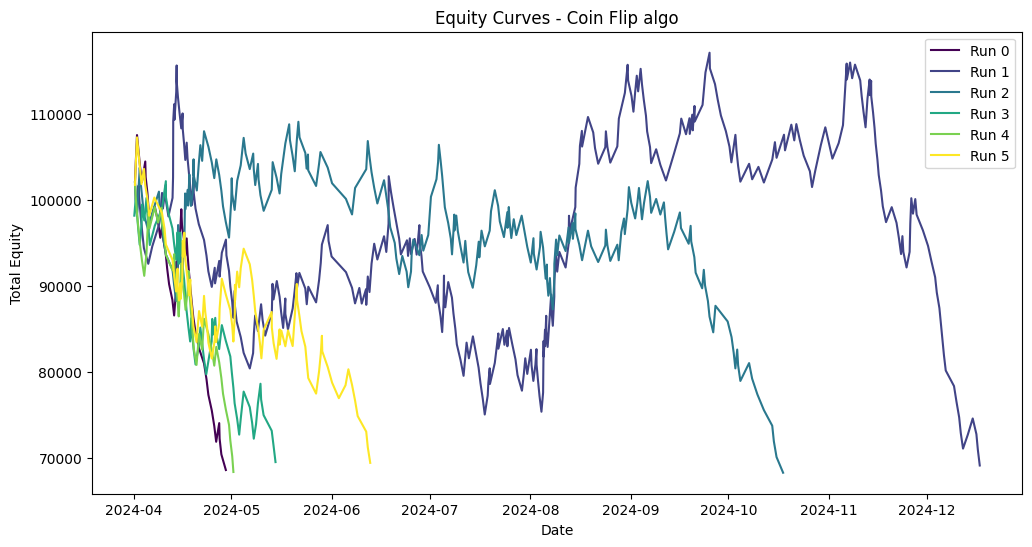

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

trade_files = []
initial_cash = 100000

for i in range(10):
    trade_file = f'coinflip_15m_crypto_20240401_SOLUSDTUSDT_trades_{i}.csv'
    if os.path.exists(trade_file):
        print(trade_file)
        pd_flattenned_trades = pd.read_csv(trade_file)
        pd_flattenned_trades = pd_flattenned_trades[(pd_flattenned_trades.reason != 'entry') & (pd_flattenned_trades.reason != 'HC')]
        pd_flattenned_trades['trade_datetime'] = pd.to_datetime(pd_flattenned_trades['trade_datetime'])
        pd_flattenned_trades.sort_values(by='trade_datetime', inplace=True)
        pd_flattenned_trades['total_equity'] = pd_flattenned_trades['trade_pnl_less_comm'].cumsum() + initial_cash
        pd_flattenned_trades['interval_return'] = np.log(pd_flattenned_trades['total_equity'] / pd_flattenned_trades['total_equity'].shift(1))
        pd_flattenned_trades.set_index('trade_datetime', inplace=True)
        trade_files.append(pd_flattenned_trades)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(trade_files)))
for idx, df in enumerate(trade_files):
    plt.plot(df.index, df['total_equity'], color=colors[idx], label=f'Run {idx}')

if trade_files:
    plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Equity')
plt.title('Equity Curves - Coin Flip algo')
plt.show()

                     Strategy
-------------------  ----------
Start Period         2024-04-01
End Period           2025-10-23
Risk-Free Rate       5.0%
Time in Market       100.0%

Cumulative Return    18.93%
CAGR﹪               7.97%

Sharpe               0.24
Prob. Sharpe Ratio   28.27%
Sortino              0.37
Sortino/√2           0.26
Omega                1.03

Max Drawdown         -32.36%
Max DD Date          2025-01-02
Max DD Period Start  2024-08-07
Max DD Period End    2025-10-23
Longest DD Days      442

Gain/Pain Ratio      0.07
Gain/Pain (1M)       0.43

Payoff Ratio         1.31
Profit Factor        1.06
Common Sense Ratio   1.67
CPC Index            0.62
Tail Ratio           1.58
Outlier Win Ratio    1.58
Outlier Loss Ratio   1.22

MTD                  -7.17%
3M                   -0.55%
6M                   0.18%
YTD                  23.64%
1Y                   -0.01%
3Y (ann.)            7.97%
5Y (ann.)            7.97%
10Y (ann.)           7.97%
All-time (ann.)      7.9

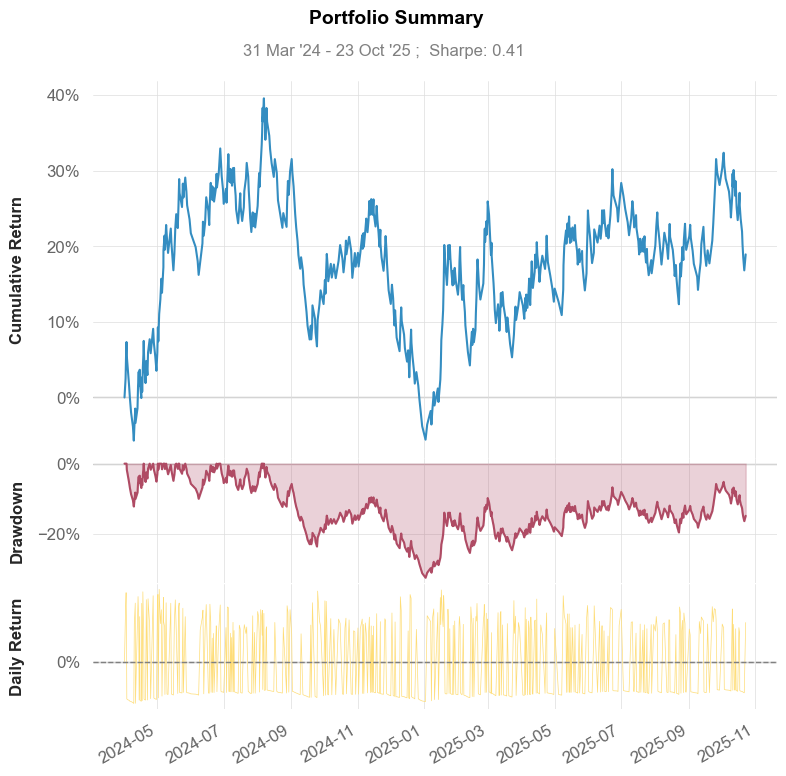

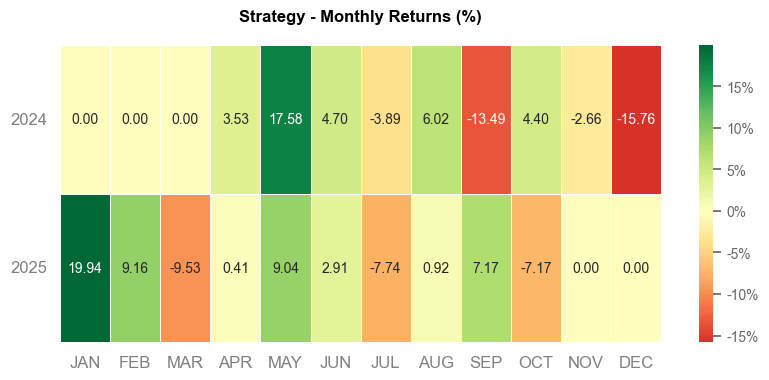

In [4]:
# https://github.com/ranaroussi/quantstats
%matplotlib inline
import quantstats as qs

RISK_FREE_RATE = 0.05 # 5%

qs.reports.basic(
    returns=pd_flattenned_trades['interval_return'], 
    rf=RISK_FREE_RATE,
    title="Tear Sheet"
    )